<a href="https://colab.research.google.com/github/carloswinterfarias/meurepositorio/blob/main/DesafioIndicium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set (color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats

In [144]:
!pip freeze > requirements.txt

In [2]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving wage_train.csv to wage_train.csv
Saving wage_test.csv to wage_test.csv


In [69]:
cols = [
        'age', 'workclass', 'fnlwgt',
        'education', 'education-num', 'marital_status',
        'occupation', 'relationship', 'race', 'sex',
        'capital_gain', 'capital_loss', 'hours_per_week',
        'native_country', 'yearly_wage'


]

In [70]:
df = pd.read_csv('wage_train.csv')

df.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [92]:
dftest = pd.read_csv("wage_test.csv")
dftest.drop('Unnamed: 0', axis = 1)
dftest.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
4,4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [97]:
Y_cleaned = dftest.drop('Unnamed: 0', axis = 1)
Y_cleaned.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [72]:
# entradas e informação de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education_num   32560 non-null  int64 
 6   marital_status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital_gain    32560 non-null  int64 
 12  capital_loss    32560 non-null  int64 
 13  hours_per_week  32560 non-null  int64 
 14  native_country  32560 non-null  object
 15  yearly_wage     32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [73]:
# análise das colunas, fazer contagem
for column in "workclass education marital_status occupation relationship race sex native_country yearly_wage".split():
    print(column, ':')
    print(df[column].value_counts())
    print()

workclass :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

education :
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

marital_status :
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

occupation :
 Prof-special

In [106]:
# fazer o encoding categórico
!pip install wget
!pip install category_encoders

import category_encoders as ce

X = df.drop('yearly_wage', axis = 1)
X = df.drop('Unnamed: 0', axis = 1)

encoder = ce.OrdinalEncoder(cols=list(
    X.select_dtypes(include='object').columns) [:]
)
encoder.fit(X, df['yearly_wage'])
X_cleaned = encoder.transform(X)

X_cleaned.head(10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,1,83311,1,13,1,1,1,1,1,0,0,13,1,1
1,38,2,215646,2,9,2,2,2,1,1,0,0,40,1,1
2,53,2,234721,3,7,1,2,1,2,1,0,0,40,1,1
3,28,2,338409,1,13,1,3,3,2,2,0,0,40,2,1
4,37,2,284582,4,14,1,1,3,1,2,0,0,40,1,1
5,49,2,160187,5,5,3,4,2,2,2,0,0,16,3,1
6,52,1,209642,2,9,1,1,1,1,1,0,0,45,1,2
7,31,2,45781,4,14,4,3,2,1,2,14084,0,50,1,2
8,42,2,159449,1,13,1,1,1,1,1,5178,0,40,1,2
9,37,2,280464,6,10,1,1,1,2,1,0,0,80,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


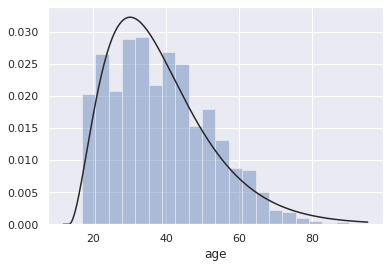

In [75]:
# Plotar as features numéricas e suas distribuições

sns.distplot(df['age'], bins=20, kde=False, fit=stats.gamma)








/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


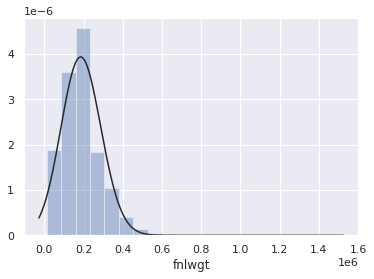

In [15]:
sns.distplot(df['fnlwgt'], bins=20, kde=False, fit=stats.gamma)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


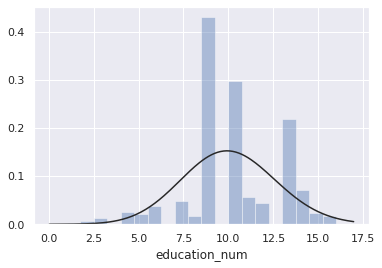

In [17]:
sns.distplot(df['education_num'], bins=20, kde=False, fit=stats.gamma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


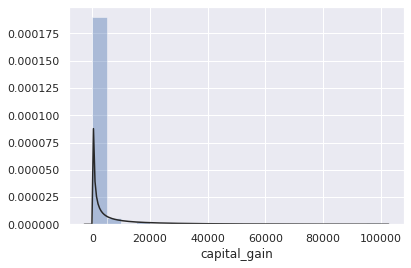

In [18]:
sns.distplot(df['capital_gain'], bins=20, kde=False, fit=stats.gamma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


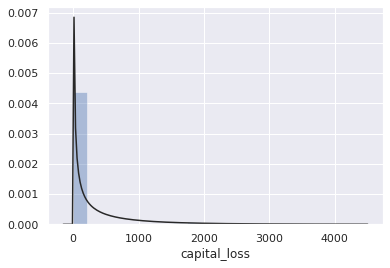

In [19]:
sns.distplot(df['capital_loss'], bins=20, kde=False, fit=stats.gamma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


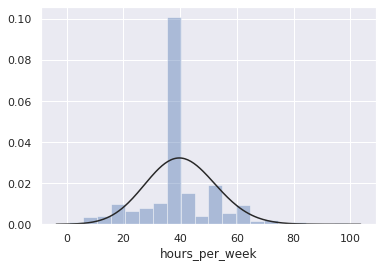

In [20]:
sns.distplot(df['hours_per_week'], bins=20, kde=False, fit=stats.gamma)

In [35]:
num_cols = list (
    set (
        df.select_dtypes (
            include='number'
                ).columns
             ) - set(['education-num'])
             ) + ['yearly_wage']
            

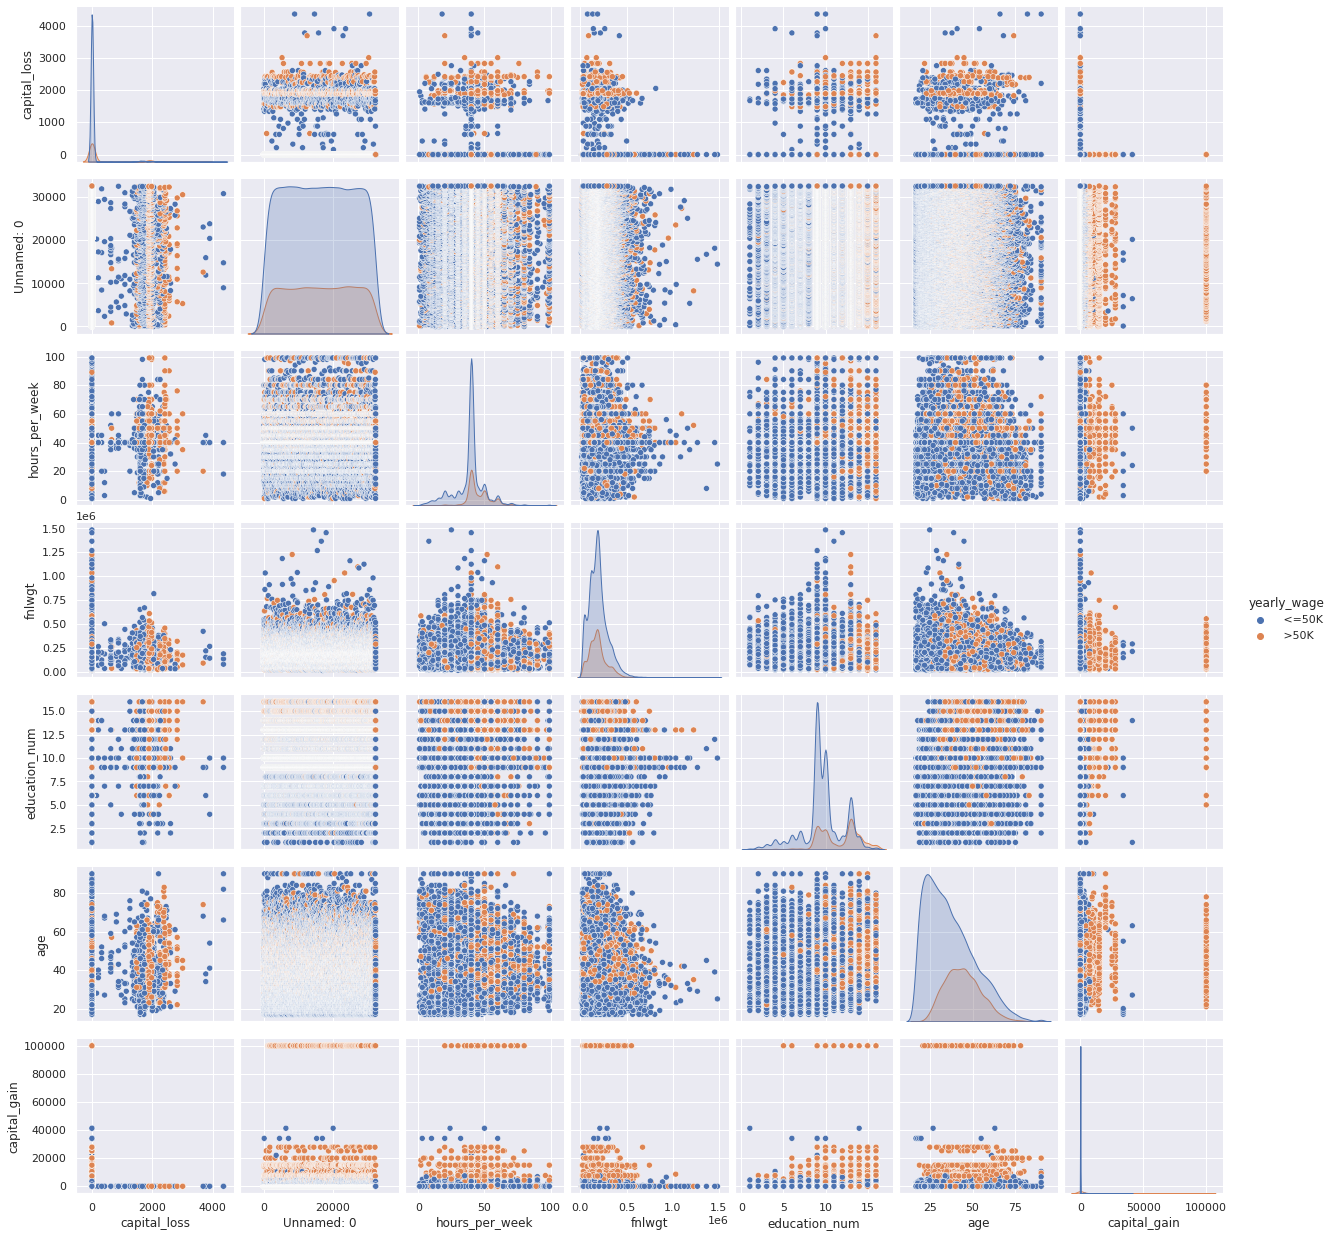

In [136]:
 g = sns.pairplot(
                 df[num_cols],
                 hue = "yearly_wage",
                 height = 2.5,
                 aspect = 1,
             )

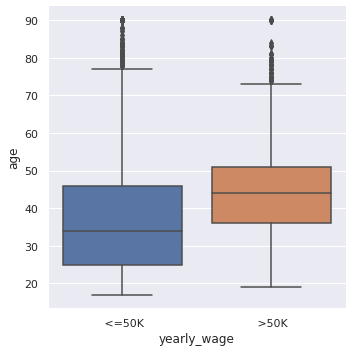

In [24]:
sns.catplot(x="yearly_wage", y="age", kind="box", data=df)

In [107]:
X_cleaned.corr()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
age,1.000000,0.107740,-0.076646,0.007768,0.036527,-0.262091,-0.000245,-0.308112,-0.039999,-0.088832,0.077674,0.057775,0.068756,-0.011572,0.234039
workclass,0.107740,1.000000,-0.014243,0.013750,0.069818,0.000772,0.203643,-0.003000,0.018231,0.029777,0.037334,0.014407,-0.039628,-0.021456,0.061528
fnlwgt,-0.076646,-0.014243,1.000000,0.024157,-0.043159,0.025119,0.013120,0.024934,0.000488,-0.026882,0.000437,-0.010259,-0.018770,0.035902,-0.009481
education,0.007768,0.013750,0.024157,1.000000,-0.279589,0.027173,0.065647,0.040644,0.029628,0.000528,0.024159,-0.003199,-0.050027,0.067613,-0.046237
education_num,0.036527,0.069818,-0.043159,-0.279589,1.000000,-0.101251,-0.284144,-0.142134,-0.039748,-0.012256,0.122627,0.079932,0.148127,-0.066036,0.335182
marital_status,-0.262091,0.000772,0.025119,0.027173,-0.101251,1.000000,0.022008,0.567397,0.069532,0.370773,-0.076112,-0.066764,-0.242484,0.008971,-0.381245
occupation,-0.000245,0.203643,0.013120,0.065647,-0.284144,0.022008,1.000000,0.008419,0.023677,-0.056599,-0.066277,-0.037941,-0.081628,0.010712,-0.161575
relationship,-0.308112,-0.003000,0.024934,0.040644,-0.142134,0.567397,0.008419,1.000000,0.115254,0.489490,-0.074402,-0.076340,-0.249701,0.041244,-0.342172
race,-0.039999,0.018231,0.000488,0.029628,-0.039748,0.069532,0.023677,0.115254,1.000000,0.067833,-0.007990,-0.017192,-0.033115,0.241648,-0.067720
sex,-0.088832,0.029777,-0.026882,0.000528,-0.012256,0.370773,-0.056599,0.489490,0.067833,1.000000,-0.048477,-0.045572,-0.229312,0.005972,-0.215995


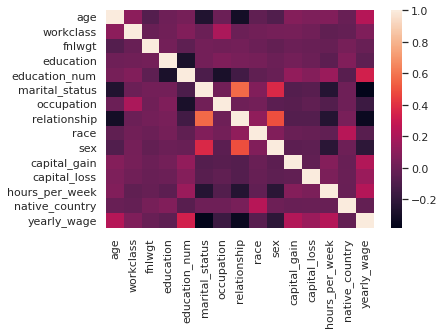

In [108]:
corr = X_cleaned.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values)

In [110]:
Y = df['yearly_wage']

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [129]:
Xtr, Xval, ytr, yval = train_test_split(X_cleaned, Y, test_size=0.3,random_state=0)

forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=22,
                                 random_state=0)
forest.fit(Xtr, ytr)

RandomForestClassifier(n_estimators=22, random_state=0)

In [130]:
y_pred = forest.predict(Xval)

In [134]:
print(forest.predict(Xval))

[' >50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']


In [135]:
resultado = pd.DataFrame(y_pred)
resultado

,0
0,>50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
9763,<=50K
9764,>50K
9765,>50K
9766,<=50K
